In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import prep

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['text_cleaned'] = df.text.apply(prep.basic_clean)

In [5]:
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [6]:
df['text_tokenized'] = df.text_cleaned.apply(prep.tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [7]:
df['text_lemmatized'] = df.text_tokenized.apply(prep.lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...


In [8]:
df['text_filtered'] = df.text_lemmatized.apply(prep.remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


In [9]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [10]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"


In [11]:
ham_words = ' '.join(df[df.label=='ham'].text_filtered)
spam_words = ' '.join(df[df.label=='spam'].text_filtered)
all_words = ' '.join(df.text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

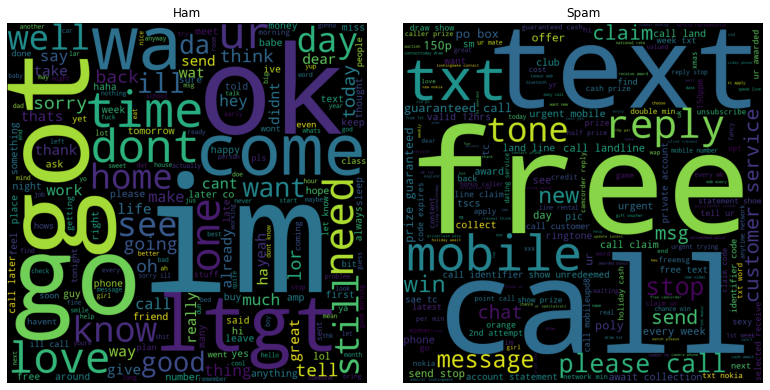

In [12]:
from wordcloud import WordCloud

ham_cloud = WordCloud(background_color='black', 
                      height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='black', 
                      height=800, width=800).generate(spam_words)


plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

In [13]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,..."


In [14]:
df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams,trigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]","[(ok, lar, joking), (lar, joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ...","[(free, entrywkly, comp), (entrywkly, comp, wi..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,...","[(nah, dont, think), (dont, think, go), (think..."


In [15]:
df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams,trigrams,fourgrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ...","[(go, jurong, point, crazy), (jurong, point, c..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]","[(ok, lar, joking), (lar, joking, wifoni)]","[(ok, lar, joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ...","[(free, entrywkly, comp), (entrywkly, comp, wi...","[(free, entrywkly, comp, win), (entrywkly, com..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early...","[(u, dun, say, early), (dun, say, early, horc)..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,...","[(nah, dont, think), (dont, think, go), (think...","[(nah, dont, think, go), (dont, think, go, usf..."


In [16]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(25)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(25)
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(25)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(25)
ham_fourgrams = pd.Series(list(nltk.ngrams(ham_words.split(), 4))).value_counts().head(25)
spam_fourgrams = pd.Series(list(nltk.ngrams(spam_words.split(), 4))).value_counts().head(25)

In [17]:
ham_bigrams

(call, later)      47
(ill, call)        45
(let, know)        41
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        26
(im, going)        22
(pls, send)        22
(take, care)       21
(ok, lor)          19
(ltgt, min)        19
(good, night)      19
(im, gonna)        19
(last, night)      18
(hi, hi)           18
(great, day)       17
(happy, new)       15
(send, message)    14
(like, ltgt)       14
(want, go)         13
(dont, think)      13
(cant, pick)       13
(pick, phone)      13
(cant, wait)       12
dtype: int64

In [18]:
spam_bigrams

(please, call)          42
(customer, service)     27
(guaranteed, call)      23
(po, box)               23
(1000, cash)            22
(prize, guaranteed)     22
(send, stop)            19
(every, week)           19
(show, 800)             18
(await, collection)     18
(urgent, mobile)        18
(land, line)            18
(valid, 12hrs)          17
(claim, call)           16
(sae, tc)               16
(account, statement)    16
(call, mobileupd8)      15
(selected, receive)     15
(call, customer)        15
(reply, call)           15
(identifier, code)      15
(call, 08000930705)     15
(2000, prize)           14
(ur, awarded)           14
(2nd, attempt)          14
dtype: int64

In [19]:
ham_trigrams

(sorry, ill, call)           38
(ill, call, later)           38
(happy, new, year)           13
(pls, send, message)         12
(phone, right, pls)          12
(cant, pick, phone)          12
(pick, phone, right)         12
(right, pls, send)           12
(hi, hi, hi)                 11
(good, morning, dear)         7
(pls, convey, birthday)       6
(kiss, across, sea)           6
(convey, birthday, wish)      6
(latr, wid, caken)            5
(ok, sed, sexy)               5
(happy, bday, bos)            5
(wish, parent, forgotkid)     5
(minute, ok, sed)             5
(wife, didnt, wish)           5
(go, bedroom, minute)         5
(love, go, day)               5
(wa, bday, wife)              5
(week, wa, bday)              5
(bday, wife, didnt)           5
(saidmind, go, bedroom)       5
dtype: int64

In [20]:
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(private, 2003, account)               13
(reply, call, 08000930705)             13
(2003, account, statement)             13
(show, 800, unredeemed)                12
(camcorder, reply, call)               12
(guaranteed, 1000, cash)               12
(every, week, txt)                     11
(bonus, caller, prize)                 11
(anytime, network, min)                11
(cash, await, collection)              10
(1000, cash, 2000)                     10
(customer, service, representative)    10
(2000, bonus, caller)                  10
(please, call, customer)               10
(toneur, mob, every)                    9
(800, unredeemed, point)                9
(750, anytime, network)                 9
(free, 1st, week)                       9
(mob, every, week)                      9
(receive, 350, award)                   9
(urgent, mobile, number)          

In [21]:
ham_fourgrams

(sorry, ill, call, later)               34
(pick, phone, right, pls)               12
(cant, pick, phone, right)              12
(phone, right, pls, send)               12
(right, pls, send, message)             11
(hi, hi, hi, hi)                         6
(pls, convey, birthday, wish)            6
(felt, special, askdlunch, lunch)        5
(man, last, week, wa)                    5
(sed, sexy, mood, cameminuts)            5
(ill, call, later, meeting)              5
(latr, wid, caken, wife)                 5
(ok, sed, sexy, mood)                    5
(wa, bday, wife, didnt)                  5
(parent, forgotkid, went, work)          5
(work, even, colleague, wish)            5
(bos, felt, special, askdlunch)          5
(minute, ok, sed, sexy)                  5
(cameminuts, latr, wid, caken)           5
(pa, said, happy, bday)                  5
(cabin, pa, said, happy)                 5
(go, bedroom, minute, ok)                5
(didnt, wish, parent, forgotkid)         5
(set, calle

In [22]:
spam_fourgrams

(private, 2003, account, statement)          13
(2000, bonus, caller, prize)                 10
(camcorder, reply, call, 08000930705)        10
(please, call, customer, service)            10
(call, customer, service, representative)    10
(draw, txt, music, 87066)                     9
(2000, prize, guaranteed, call)               9
(mob, every, week, txt)                       9
(show, 800, unredeemed, point)                9
(toneur, mob, every, week)                    9
(trying, contacttoday, draw, show)            9
(800, unredeemed, point, call)                9
(750, anytime, network, min)                  9
(lookingmake, contact, ufind, rreveal)        8
(urgent, mobile, number, ha)                  8
(mobile, number, ha, awarded)                 8
(claim, 3030, valid, 12hrs)                   8
(rreveal, think, ur, specialcall)             8
(contact, ufind, rreveal, think)              8
(ufind, rreveal, think, ur)                   8
(await, collection, sae, tc)            

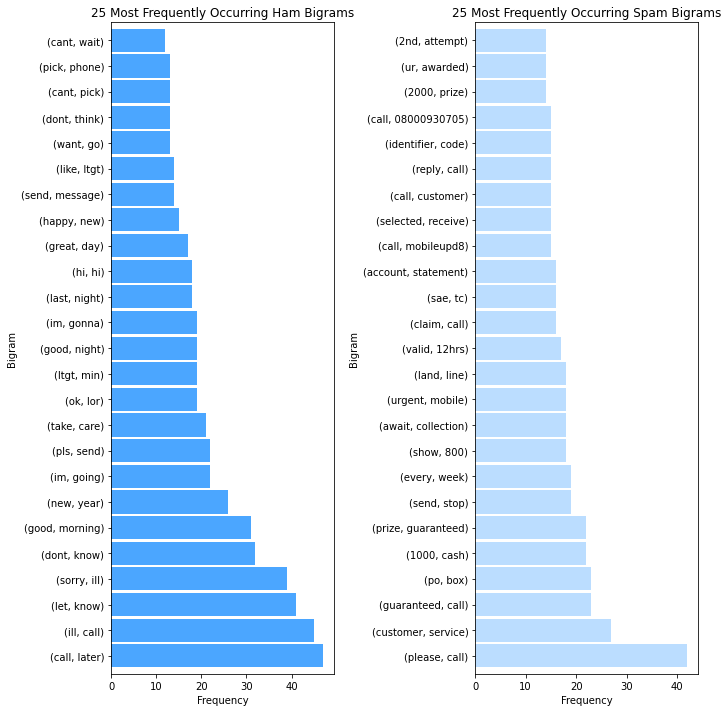

In [23]:
plt.subplot(121)
ham_bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Ham Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('25 Most Frequently Occurring Spam Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

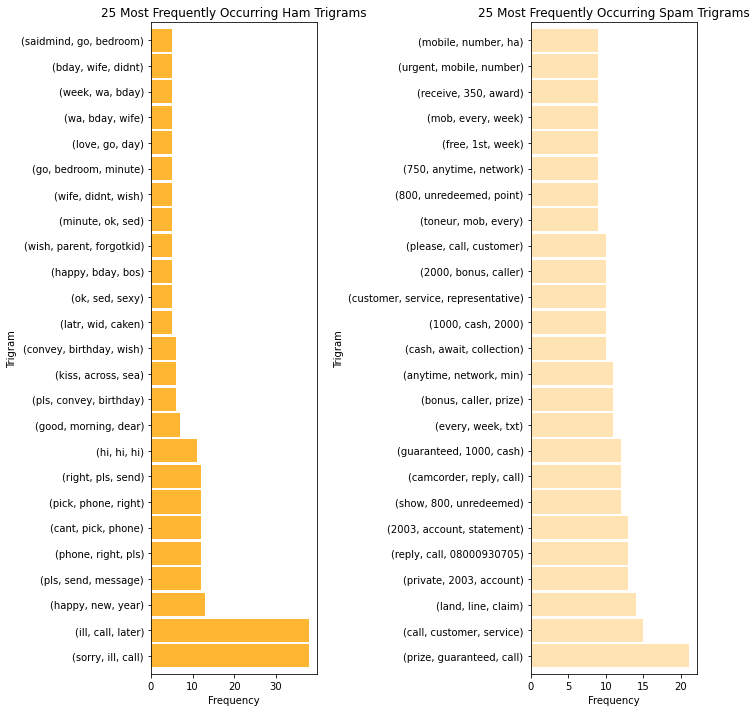

In [24]:
plt.subplot(121)
ham_trigrams.plot.barh(color='orange', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Ham Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_trigrams.plot.barh(color='orange', width=.9, figsize=(10, 10), alpha=.3)
plt.title('25 Most Frequently Occurring Spam Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

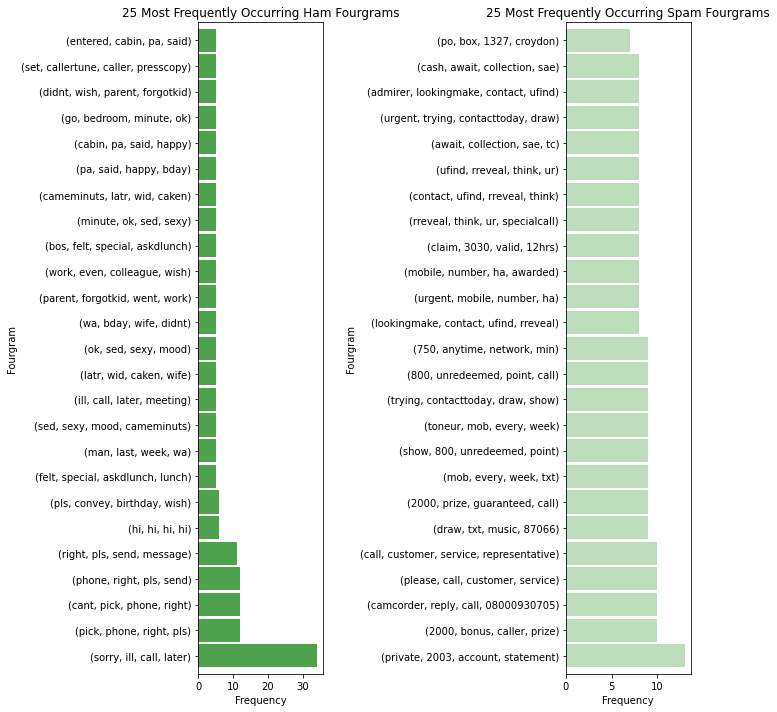

In [25]:
plt.subplot(121)
ham_fourgrams.plot.barh(color='forestgreen', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Ham Fourgrams')
plt.ylabel('Fourgram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_fourgrams.plot.barh(color='forestgreen', width=.9, figsize=(10, 10), alpha=.3)
plt.title('25 Most Frequently Occurring Spam Fourgrams')
plt.ylabel('Fourgram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

{'sorry ill call later': 34, 'pick phone right pls': 12, 'cant pick phone right': 12, 'phone right pls send': 12, 'right pls send message': 11, 'hi hi hi hi': 6, 'pls convey birthday wish': 6, 'felt special askdlunch lunch': 5, 'man last week wa': 5, 'sed sexy mood cameminuts': 5, 'ill call later meeting': 5, 'latr wid caken wife': 5, 'ok sed sexy mood': 5, 'wa bday wife didnt': 5, 'parent forgotkid went work': 5, 'work even colleague wish': 5, 'bos felt special askdlunch': 5, 'minute ok sed sexy': 5, 'cameminuts latr wid caken': 5, 'pa said happy bday': 5, 'cabin pa said happy': 5, 'go bedroom minute ok': 5, 'didnt wish parent forgotkid': 5, 'set callertune caller presscopy': 5, 'entered cabin pa said': 5}


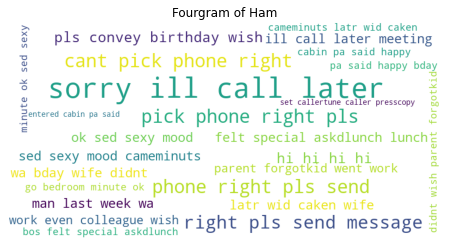

In [26]:
hfg = {k[0] + ' ' + k[1] + ' ' + k[2] + ' ' + k[3]: v for k, v in ham_fourgrams.to_dict().items()}
img1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(hfg)
plt.figure(figsize=(8, 4))
plt.imshow(img1)
plt.title('Fourgram of Ham')
plt.axis('off')
print(hfg)

{'sorry ill call': 38, 'ill call later': 38, 'happy new year': 13, 'pls send message': 12, 'phone right pls': 12, 'cant pick phone': 12, 'pick phone right': 12, 'right pls send': 12, 'hi hi hi': 11, 'good morning dear': 7, 'pls convey birthday': 6, 'kiss across sea': 6, 'convey birthday wish': 6, 'latr wid caken': 5, 'ok sed sexy': 5, 'happy bday bos': 5, 'wish parent forgotkid': 5, 'minute ok sed': 5, 'wife didnt wish': 5, 'go bedroom minute': 5, 'love go day': 5, 'wa bday wife': 5, 'week wa bday': 5, 'bday wife didnt': 5, 'saidmind go bedroom': 5}


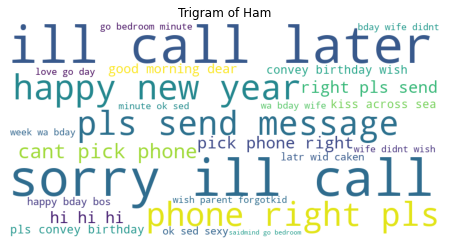

In [27]:
htg = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
img2 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(htg)
plt.figure(figsize=(8, 4))
plt.imshow(img2)
plt.title('Trigram of Ham')
plt.axis('off')
print(htg)

{'call later': 47, 'ill call': 45, 'let know': 41, 'sorry ill': 39, 'dont know': 32, 'good morning': 31, 'new year': 26, 'im going': 22, 'pls send': 22, 'take care': 21, 'ok lor': 19, 'ltgt min': 19, 'good night': 19, 'im gonna': 19, 'last night': 18, 'hi hi': 18, 'great day': 17, 'happy new': 15, 'send message': 14, 'like ltgt': 14, 'want go': 13, 'dont think': 13, 'cant pick': 13, 'pick phone': 13, 'cant wait': 12}


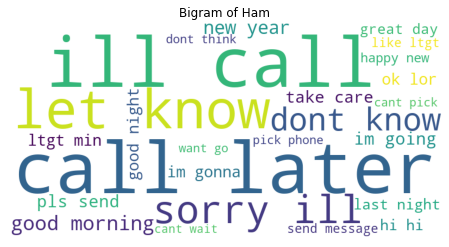

In [28]:
hbg = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img3 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(hbg)
plt.figure(figsize=(8, 4))
plt.imshow(img3)
plt.title('Bigram of Ham')
plt.axis('off')
print(hbg)

In [29]:
blogs = pd.read_json('blogs.json')
blogs.head()

,title,body
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...


In [30]:
blog_df = prep.prep_article_data(blogs, 'body', extra_words=[], exclude_words=[])

In [31]:
blog_df.head()

,title,body,stemmed,lemmatized,clean
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...


In [32]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in blog_df.clean]
blog_df = pd.concat([blog_df, pd.DataFrame({'words': words})], axis=1)

In [33]:
blog_df

,title,body,stemmed,lemmatized,clean,words
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger..."


In [34]:
blog_df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)..."


In [35]:
blog_df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,..."


In [36]:
blog_df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams,fourgrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (...","[(rumor, true, time, arrived), (true, time, ar..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi...","[(dimitri, antoniou, maggie, giust), (antoniou..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a...","[(dimitri, antoniou, week, ago), (antoniou, we..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai...","[(sa, tech, job, fair), (tech, job, fair, thir..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,...","[(competitor, bootcamps, closing, model), (boo..."


In [37]:
blog_df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams,fourgrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (...","[(rumor, true, time, arrived), (true, time, ar..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi...","[(dimitri, antoniou, maggie, giust), (antoniou..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a...","[(dimitri, antoniou, week, ago), (antoniou, we..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai...","[(sa, tech, job, fair), (tech, job, fair, thir..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,...","[(competitor, bootcamps, closing, model), (boo..."


In [38]:
blog_df.insert(0, "type", "blog") 
blog_df.head() 

,type,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams,fourgrams
0,blog,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (...","[(rumor, true, time, arrived), (true, time, ar..."
1,blog,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi...","[(dimitri, antoniou, maggie, giust), (antoniou..."
2,blog,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a...","[(dimitri, antoniou, week, ago), (antoniou, we..."
3,blog,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai...","[(sa, tech, job, fair), (tech, job, fair, thir..."
4,blog,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,...","[(competitor, bootcamps, closing, model), (boo..."


In [39]:
words = ' '.join(blog_df[blog_df.type=='blog'].clean)

words = re.sub(r'\s.\s', '', words)


bigrams = pd.Series(list(nltk.ngrams(words.split(), 2))).value_counts().head(25)
trigrams = pd.Series(list(nltk.ngrams(words.split(), 3))).value_counts().head(25)
fourgrams = pd.Series(list(nltk.ngrams(words.split(), 4))).value_counts().head(25)

Text(0.5, 0, 'Frequency')

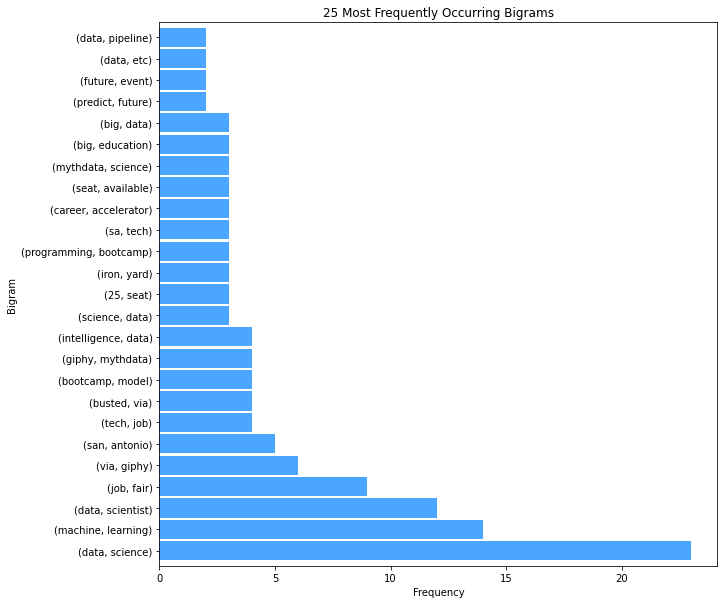

In [40]:
bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

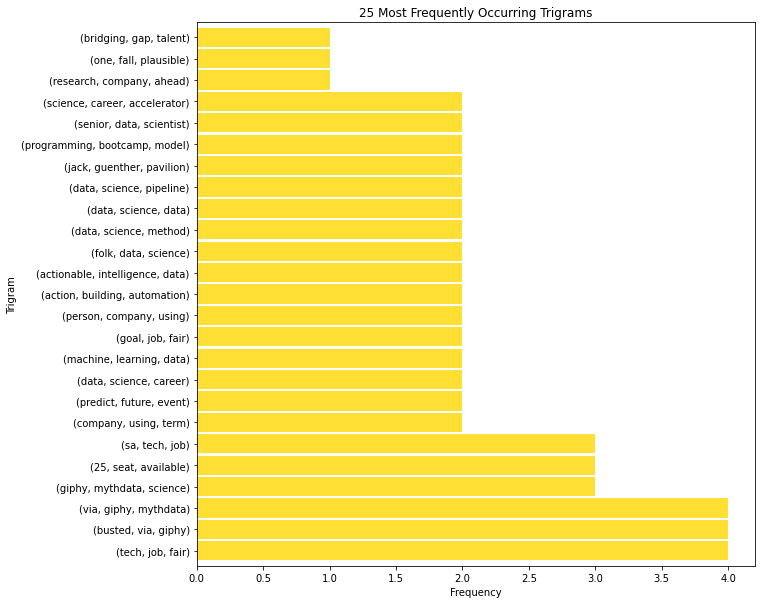

In [41]:
trigrams.plot.barh(color='gold', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

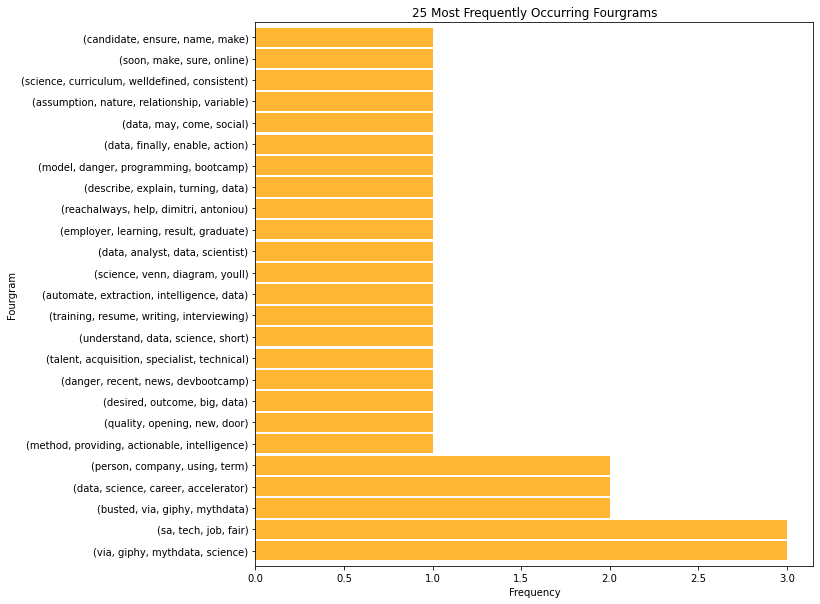

In [42]:
fourgrams.plot.barh(color='orange', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Fourgrams')
plt.ylabel('Fourgram')
plt.xlabel('Frequency')

{'data science': 23, 'machine learning': 14, 'data scientist': 12, 'job fair': 9, 'via giphy': 6, 'san antonio': 5, 'tech job': 4, 'busted via': 4, 'bootcamp model': 4, 'giphy mythdata': 4, 'intelligence data': 4, 'science data': 3, '25 seat': 3, 'iron yard': 3, 'programming bootcamp': 3, 'sa tech': 3, 'career accelerator': 3, 'seat available': 3, 'mythdata science': 3, 'big education': 3, 'big data': 3, 'predict future': 2, 'future event': 2, 'data etc': 2, 'data pipeline': 2}


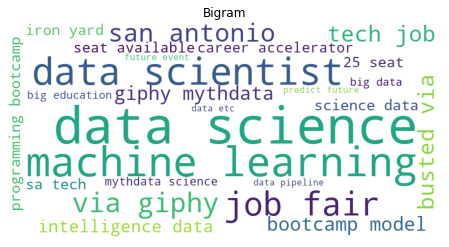

In [43]:
bg = {k[0] + ' ' + k[1]: v for k, v in bigrams.to_dict().items()}
img4 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(bg)
plt.figure(figsize=(8, 4))
plt.imshow(img4)
plt.title('Bigram')
plt.axis('off')
print(bg)

{'tech job fair': 4, 'busted via giphy': 4, 'via giphy mythdata': 4, 'giphy mythdata science': 3, '25 seat available': 3, 'sa tech job': 3, 'company using term': 2, 'predict future event': 2, 'data science career': 2, 'machine learning data': 2, 'goal job fair': 2, 'person company using': 2, 'action building automation': 2, 'actionable intelligence data': 2, 'folk data science': 2, 'data science method': 2, 'data science data': 2, 'data science pipeline': 2, 'jack guenther pavilion': 2, 'programming bootcamp model': 2, 'senior data scientist': 2, 'science career accelerator': 2, 'research company ahead': 1, 'one fall plausible': 1, 'bridging gap talent': 1}


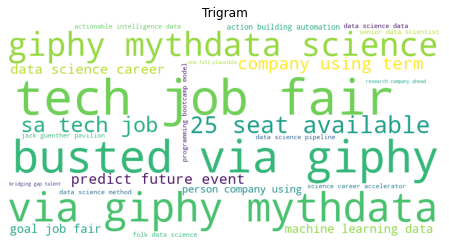

In [44]:
tg = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in trigrams.to_dict().items()}
img5 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(tg)
plt.figure(figsize=(8, 4))
plt.imshow(img5)
plt.title('Trigram')
plt.axis('off')
print(tg)

{'via giphy mythdata science': 3, 'sa tech job fair': 3, 'busted via giphy mythdata': 2, 'data science career accelerator': 2, 'person company using term': 2, 'method providing actionable intelligence': 1, 'quality opening new door': 1, 'desired outcome big data': 1, 'danger recent news devbootcamp': 1, 'talent acquisition specialist technical': 1, 'understand data science short': 1, 'training resume writing interviewing': 1, 'automate extraction intelligence data': 1, 'science venn diagram youll': 1, 'data analyst data scientist': 1, 'employer learning result graduate': 1, 'reachalways help dimitri antoniou': 1, 'describe explain turning data': 1, 'model danger programming bootcamp': 1, 'data finally enable action': 1, 'data may come social': 1, 'assumption nature relationship variable': 1, 'science curriculum welldefined consistent': 1, 'soon make sure online': 1, 'candidate ensure name make': 1}


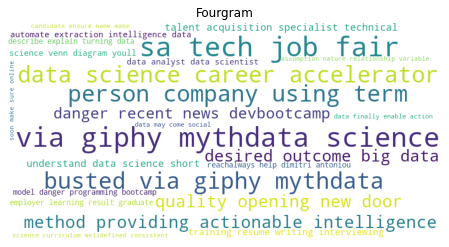

In [45]:
fg = {k[0] + ' ' + k[1] + ' ' + k[2] + ' ' + k[3]: v for k, v in fourgrams.to_dict().items()}
img6 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(fg)
plt.figure(figsize=(8, 4))
plt.imshow(img6)
plt.title('Fourgram')
plt.axis('off')
print(fg)